---
## Load data into dataframes and combine them into one: 

In [ ]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = pd.read_csv("city_data.csv")
ride_data_to_load = pd.read_csv("ride_data.csv")

# Join 2 dataframes
combined_data = pd.merge(city_data_to_load,ride_data_to_load,on='city',how='right')


---
## Dataframe 1: 
- Average Fare ($) Per City
- Total Number of Rides Per City
- Total Number of Drivers Per City
- City Type (Urban, Suburban, Rural)

In [1]:
#dataframe: Total Fares, Total Rides, Total Drivers by City Type
df1 = combined_data.groupby(["city"]).agg({"fare":'mean',
                                           "ride_id": 'count',
                                           "driver_count": 'first',
                                           "type": 'first'})
df1.head()


NameError: name 'combined_data' is not defined

---
## Bubble Plot : 
- Average Fare ($) Per City
- Total Number of Rides Per City
- Total Number of Drivers Per City
- City Type (Urban, Suburban, Rural)

In [ ]:
import matplotlib.patches as mpatches
import numpy as np

# get labels and colors for City types
labels=list(set(df1.type))
nLabels = len(labels)

colors =list()
for i in range(nLabels):
    np.random.seed(i*3+5)
    colors.append(np.random.rand(3))  
    
dictionary = dict(zip(labels, colors))


# make Bubble Plot
plt.scatter( df1.ride_id, 
            df1.fare, 
                s=df1.driver_count*10,
                alpha=0.5, linewidth=2,
                c=df1.type.map(dictionary),
                edgecolors='black')

# make legend       
patches = [ plt.plot([],[], 
                     marker="o",
                     markeredgecolor='black',
                     ms=10, ls="",
                     c=colors[i], 
                     label=labels[i]) [0]   for i in range(len(labels)) ]
plt.legend(handles=patches,loc='upper right',title= 'City Type:' )

 # Set x and y limits
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data(2016)")

plt.show()



---
## Dataframe2: % of Total Fares, Total Rides, Total Drivers by City Type

In [4]:
#dataframe: Total Fares, Total Rides, Total Drivers by City Type
df2 = combined_data.groupby(["type"]).agg({"fare":'sum',
                                           "ride_id": 'count',
                                           "driver_count": 'first'})
df2
# convert to %
#df2 = df2/df2.sum() * 100.0
#df2

,fare,ride_id,driver_count
type,,,
Rural,4327.93,125,7
Suburban,19356.33,625,7
Urban,39854.38,1625,38


---
## Pie Chart 1: % of Total Fares by City Type

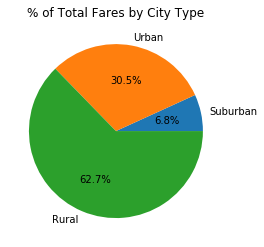

In [5]:
plt.pie(df2.fare,labels=list(set(df1.type)), autopct='%1.1f%%')
plt.title("% of Total Fares by City Type")
plt.show()


---
## Pie Chart 2: % of Total Rides by City Type

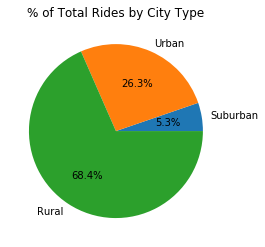

In [6]:
plt.pie(df2.ride_id,labels=list(set(df1.type)), autopct='%1.1f%%')
plt.title("% of Total Rides by City Type")
plt.show()


---
## Pie Chart 3: % of Total Drivers by City Type

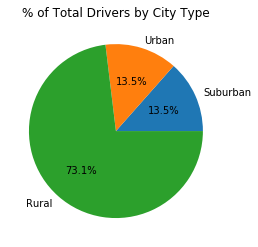

In [7]:
plt.pie(df2.driver_count,labels=list(set(df1.type)), autopct='%1.1f%%')
plt.title("% of Total Drivers by City Type")
plt.show()

